In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd, numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers import Flatten, InputLayer, Dense, Conv2D, MaxPooling2D, Dropout

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images/255
test_images = test_images/255

11490434/11490434 [==============================] - 0s 0us/step


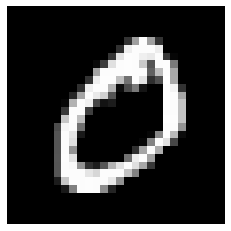

In [4]:
plt.imshow(train_images[1], cmap = 'gray')
plt.axis('off')
plt.show()

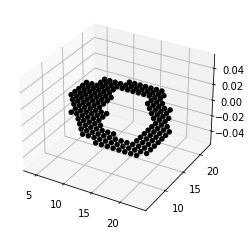

In [5]:
x, y, z = np.expand_dims(train_images[1], -1).nonzero()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c='k', alpha=1)
plt.show()

In [6]:
from plotly import graph_objects as go

data = pd.DataFrame(train_images[1])
colors = [[0, 'white'], [0.5, 'gray'], [1, 'black']]
fig = go.Figure(data=[go.Surface(z=data, colorscale = colors)])
fig.show()

In [7]:
model = Sequential()
# 32 filtres de 5x5 produisant 32 feature maps de 24x24
model.add(InputLayer(input_shape=(28, 28, 1), name = 'input_layer'))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', name = 'conv_layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'pooling_layer'))
model.add(Flatten(name = 'flatten_layer'))
model.add(Dropout(0.5, name = 'dropout_layer'))
model.add(Dense(10, activation='softmax', name = 'output_layer'))

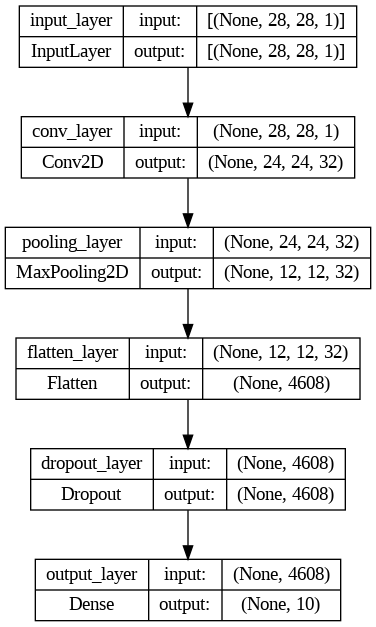

In [8]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Biais :  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Taille de la matrice des poids :  (5, 5, 1, 32)

Filtre : 1 

          0         1         2         3         4
0 -0.056473 -0.084450  0.036968 -0.059349  0.060482
1 -0.084309 -0.023577  0.035981  0.071834  0.022763
2 -0.057111  0.031467 -0.047586 -0.028050 -0.079865
3  0.020324 -0.012499  0.036520 -0.012374 -0.076557
4  0.032280  0.047939  0.055955 -0.074454  0.027567

Filtre : 2 

          0         1         2         3         4
0  0.008068 -0.016861  0.044033 -0.042621 -0.007473
1 -0.064635  0.014053  0.027853  0.072538  0.019972
2  0.028169 -0.028242 -0.081515  0.011899  0.037765
3  0.064525  0.069828 -0.056028  0.024694 -0.029351
4 -0.065063  0.018753  0.008929 -0.014426  0.070990

Filtre : 3 

          0         1         2         3         4
0  0.001006 -0.013303  0.068076  0.027622 -0.011756
1  0.062217 -0.051816  0.050889 -0.062264 -0

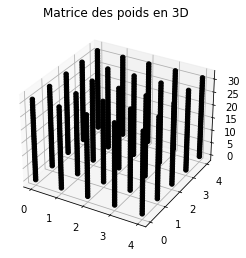

In [9]:
weights, biases = model.get_layer('conv_layer').get_weights()
print('Biais : ', *biases)

# Taille de la matrice des poids : KxCxN = 5x5x1x32 (C : nombre de canaux RGBA)
print('\nTaille de la matrice des poids : ', weights.shape)

# Visualisation des valeurs des filtres
for i in range(32):
  print('\nFiltre :', i+1, '\n')
  print(pd.DataFrame(weights[:, :, :, i].reshape(5,5)).to_string())

print('\n')
# Visualisation 3D de la matrice des poids
a = weights[:, :, 0,:]
x, y, z = a.nonzero()
ax = plt.axes(projection='3d')
plt.title('Matrice des poids en 3D')
ax.scatter(x, y, z, c='k', alpha=1)
plt.show()

In [10]:
import json
layer = model.get_layer('output_layer')
print(json.dumps(layer.get_config(), indent=3))

{
   "name": "output_layer",
   "trainable": true,
   "dtype": "float32",
   "units": 10,
   "activation": "softmax",
   "use_bias": true,
   "kernel_initializer": {
      "class_name": "GlorotUniform",
      "config": {
         "seed": null
      }
   },
   "bias_initializer": {
      "class_name": "Zeros",
      "config": {}
   },
   "kernel_regularizer": null,
   "bias_regularizer": null,
   "activity_regularizer": null,
   "kernel_constraint": null,
   "bias_constraint": null
}


In [11]:
# https://keras.io/api/layers/convolution_layers/convolution2d
import json
for layer in model.layers:
  print(json.dumps(layer.get_config(), indent=3), '\n\n_____________________________________\n')

{
   "name": "conv_layer",
   "trainable": true,
   "dtype": "float32",
   "filters": 32,
   "kernel_size": [
      5,
      5
   ],
   "strides": [
      1,
      1
   ],
   "padding": "valid",
   "data_format": "channels_last",
   "dilation_rate": [
      1,
      1
   ],
   "groups": 1,
   "activation": "relu",
   "use_bias": true,
   "kernel_initializer": {
      "class_name": "GlorotUniform",
      "config": {
         "seed": null
      }
   },
   "bias_initializer": {
      "class_name": "Zeros",
      "config": {}
   },
   "kernel_regularizer": null,
   "bias_regularizer": null,
   "activity_regularizer": null,
   "kernel_constraint": null,
   "bias_constraint": null
} 

_____________________________________

{
   "name": "pooling_layer",
   "trainable": true,
   "dtype": "float32",
   "pool_size": [
      2,
      2
   ],
   "padding": "valid",
   "strides": [
      2,
      2
   ],
   "data_format": "channels_last"
} 

_____________________________________

{
   "name": "flat

In [12]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 13.5 MB/s eta 0:00:00


In [13]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


/content


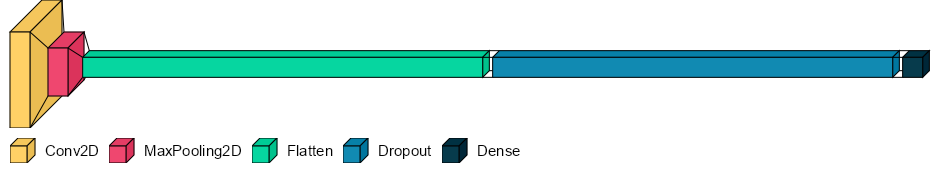

In [14]:
import visualkeras
from PIL import ImageFont

arial = ImageFont.truetype('Arial.ttf', 15)
%cd ../..
visualkeras.layered_view(model, legend = True, font = arial, to_file = 'model.png')

In [15]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [16]:
metrics = model.fit(
    train_images,
    train_labels,
    epochs = 8,
    validation_split = 0.2
)

Epoch 1/8
1500/1500 [==============================] - 21s 6ms/step - loss: 0.2474 - accuracy: 0.9261 - val_loss: 0.0885 - val_accuracy: 0.9755
Epoch 2/8
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1024 - accuracy: 0.9693 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 3/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9758 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 4/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 5/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 6/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 7/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0476 - val_accuracy: 0.986

In [17]:
labels_prob = model.predict(test_images)
labels_pred = labels_prob.argmax(axis=1)

indices = np.where(test_labels != labels_pred)
err_pred = np.array(indices).reshape(-1)

313/313 [==============================] - 1s 2ms/step


In [18]:
df = pd.DataFrame(metrics.history)
print(df)

       loss  accuracy  val_loss  val_accuracy
0  0.247357  0.926063  0.088547      0.975500
1  0.102351  0.969271  0.067829      0.980000
2  0.079746  0.975792  0.058182      0.982583
3  0.069398  0.977792  0.051381      0.984583
4  0.059160  0.981417  0.049970      0.985750
5  0.055146  0.982292  0.047909      0.985917
6  0.051422  0.983333  0.047598      0.986750
7  0.047679  0.984875  0.049981      0.986000


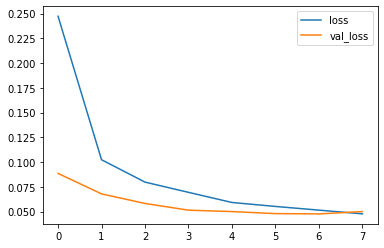

In [19]:
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

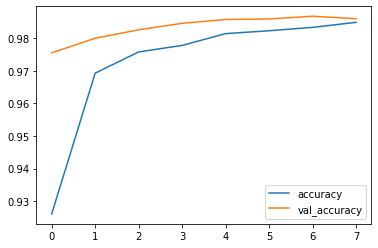

In [20]:
plt.plot(metrics.history['accuracy'])
plt.plot(metrics.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [21]:
model.save('mnist_model.h5')

In [22]:
loaded_model = keras.models.load_model('mnist_model.h5')

In [24]:
import os
from PIL import Image, ImageOps

for filename in os.listdir(os.getcwd()):
  if filename.endswith('.png'):
    image = Image.open(filename)
    image = image.convert('L')
    inverted_image = ImageOps.invert(image)
    imageAsArray = np.array(inverted_image)

    imageAsArray = imageAsArray / 255
    
    prediction = loaded_model.predict(np.expand_dims(imageAsArray, 0))
    plt.title('Label: %d' % np.argmax(prediction))
    plt.imshow(imageAsArray, cmap='gray')
    plt.axis('off')
    plt.show()

ValueError: ignored